> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    Now we will be working on TMDb movie dataset that has more than 10,000 movies with 21 columns, first we will import the data, invistigate it, do cleaning if needed, then we will ask some questions and answer them using Explaratory Data Analysis to get some insights and plots to answer our questions.
    
   ### Questions that can be answered with the Exploratory Data Analysis :
       1.what movies made most revenues ?
       2.what movies made most profits ?
       3.is it necessary that movies with most revenues are the ones with most profits ?
       4.who are the directors who made most profits along their career ?
       5.who are the actors who made the most appearances along their career ?
       6.was it fair to use 'budget_adj' & 'revenue_adj' to do analysis depending on revenue, budget & profit or not?
       

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [19]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
df.shape

(10866, 21)

# Data Assesment

    1.(id, idmb_id, vote_count, vote_average, homepage, tagline, keywords, production companies, overview) will not be needed in our analysis so i will remove them
    
    2. remove duplicates

    3.convert release date to datetime format

    4. remove all rows with NaN values
    
    

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing not needed columns)

    The selected columns to be removed will not be needed in answering the questions set for the analysis, in addition to having some of them with alot of null values so removing them will not affect the data analysis process results much.

In [23]:
df.drop(['id', 'imdb_id', 'vote_count', 'vote_average', 'homepage', 'tagline', 'keywords', 'production_companies', 'overview'] , axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1018.8+ KB


### Data Cleaning (Removing Duplicates)
    
    Duplicates might affect the analysis results so removing them is issential. 

In [24]:
df.drop_duplicates(keep ='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.1+ MB


##### Only one Duplicate was found and removed successfuly 

### Data Cleaning (changing release date format)

    Having columns' data in their right format will help making analysis easier.

In [25]:
df['release_date'] = pd.to_datetime(df['release_date'], errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1.1+ MB


### Data Cleaning (Removing columns with Null Values)

    Null values might affect the analysis so removing them is okay IF they're very small percentage that won't affect analysis results

In [26]:
df.dropna(inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1.1+ MB


#### 134 rows were removed (about 1.2% of the data) i think this won't affect the analysis results

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are top 10 movies with highest revenue?)


In [28]:
# top 10 movies highest revenue
top10_revenue = df[['revenue_adj','original_title']].nlargest(10 , 'revenue_adj')
top10_revenue

,revenue_adj,original_title
1386,2.827124e+09,Avatar
1329,2.789712e+09,Star Wars
5231,2.506406e+09,Titanic
10594,2.167325e+09,The Exorcist
9806,1.907006e+09,Jaws
3,1.902723e+09,Star Wars: The Force Awakens
8889,1.791694e+09,E.T. the Extra-Terrestrial
8094,1.583050e+09,The Net
10110,1.574815e+09,One Hundred and One Dalmatians
4361,1.443191e+09,The Avengers


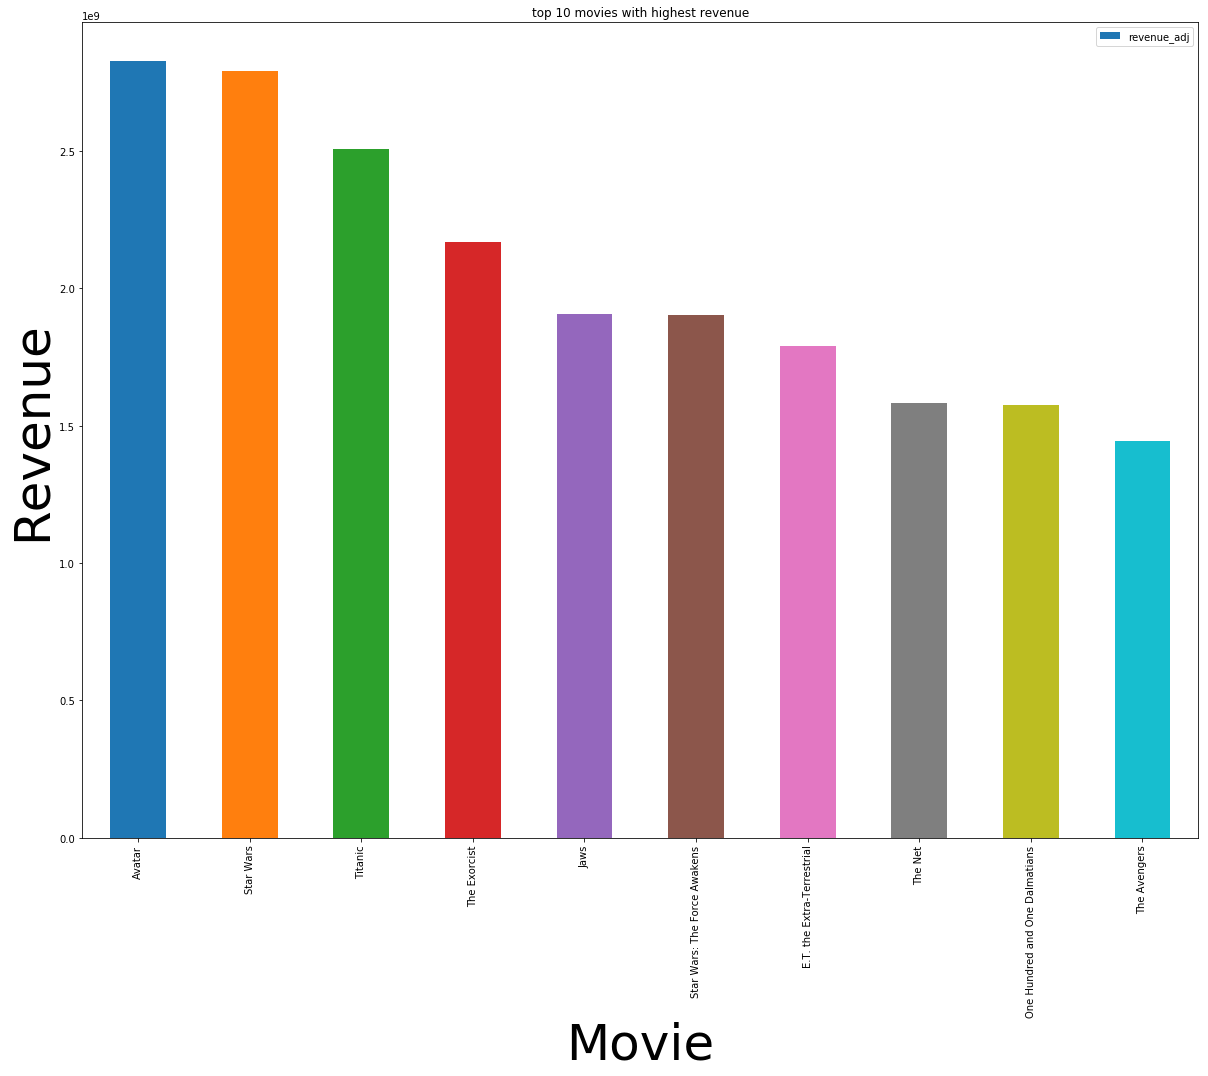

In [29]:
top10_revenue.plot.bar(x="original_title", y="revenue_adj", title="top 10 movies with highest revenue" , figsize=(20,15));
plot.xlabel('Movie', fontsize=50)
plot.ylabel('Revenue', fontsize=50)
plot.show(block=True);


As seen from the visualization the top 10 movies that made revenues are : 1.Avatar
                                                                          2.Star Wars
                                                                          3.Titanic
                                                                          4.The Exorcist
                                                                          5.Jaws
                                                                          6.Star Wars: The Force Awakens
                                                                          7.E.T. the Extra-Terrestrial
                                                                          8.The Net
                                                                          9.One Hundred and One Dalmatians
                                                                          10.The Avengers
                                                                          
                                                                          
With slight difference between Avatar & Star Wars

### Research Question 2  (top 10 movies made profit (compare with revenue))

    Revenue doesn't mean profit.. now we will find top 10 movies made profits and compare them with top 10 movies made revenues

In [30]:
#first we create profit_adj column
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
top10_profit = df[['original_title', 'profit_adj']].nlargest(10 , 'profit_adj')
top10_profit

,original_title,profit_adj
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


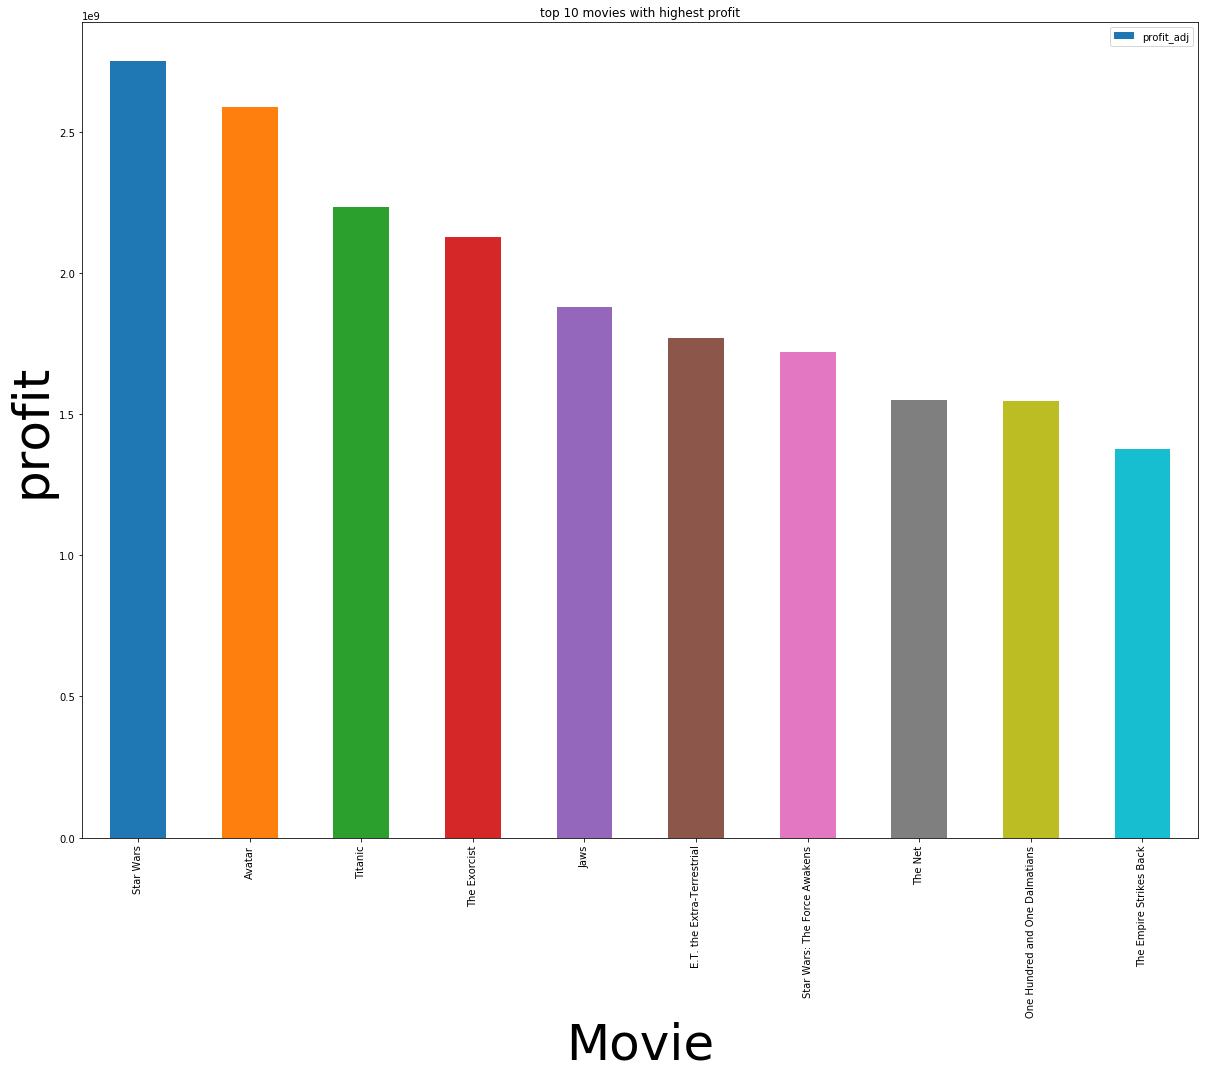

In [31]:
top10_profit.plot.bar(x="original_title", y="profit_adj", title="top 10 movies with highest profit" , figsize=(20,15));
plot.xlabel('Movie', fontsize=50)
plot.ylabel('profit', fontsize=50)
plot.show(block=True);

As we can see .. "The Avengers" Dissapeared from our list and "The Empire Strikes Back" appeared 
Also we can see that the order of the movies changed .. so as we said its not a must that a movie's revenue indicates its profit

### Here we can see a bar chart showing difference between movies revenues and profits

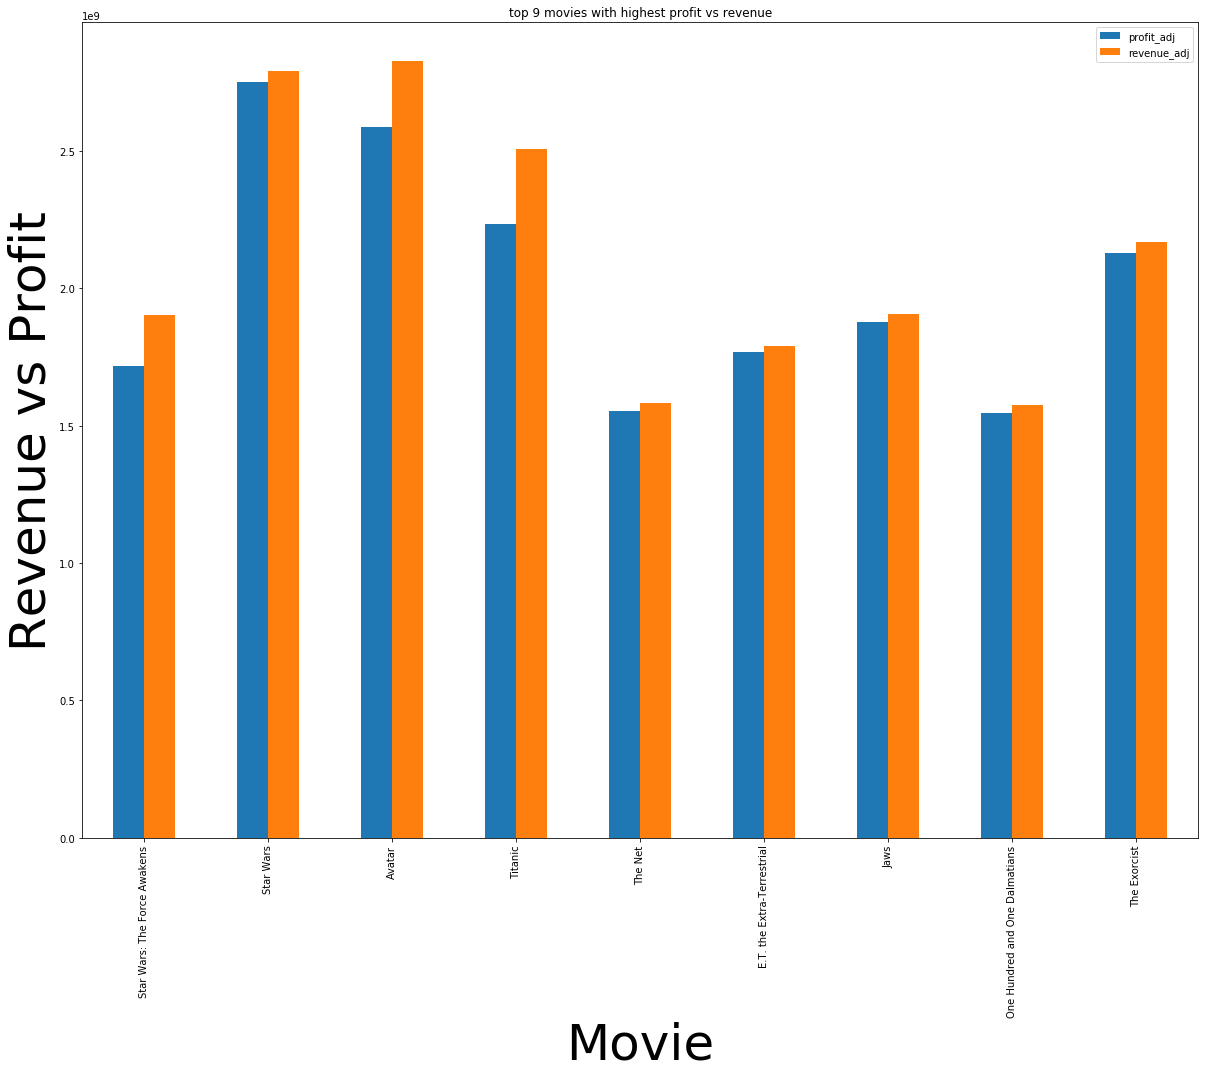

In [157]:
top9 = top10_revenue.merge(top10_profit ,  how='outer', on = 'original_title' , left_index=True, right_index=True).dropna()
top9
top9.plot.bar(x="original_title", y=["profit_adj","revenue_adj"], title="top 9 movies with highest profit vs revenue" , figsize=(20,15));
plot.xlabel('Movie', fontsize=50)
plot.ylabel('Revenue vs Profit', fontsize=50)
plot.show();

We can tell that movies with less difference between the profit and revenue are concidered more sucessful "Financially" 

### Research Question 3  (top 10 directors made profit )

    Now let's see the top 10 directors according to the profits they made

In [32]:
top10_directors = df.groupby("director").sum().sort_values("profit_adj", ascending=False).nlargest(10 , "profit_adj")
top10_directors

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj,profit_adj
director,,,,,,,,
Steven Spielberg,54.378995,1589950000,9018563772,3900,57818,2.151770e+09,1.520245e+10,1.305068e+10
James Cameron,28.824177,760045786,5841894863,1194,17934,1.030992e+09,7.327221e+09,6.296229e+09
George Lucas,23.461834,360554000,3316550893,735,11927,4.697600e+08,6.313919e+09,5.844159e+09
Peter Jackson,49.067904,1326775710,6523244659,1853,26017,1.375725e+09,7.019848e+09,5.644123e+09
Chris Columbus,31.514525,627000000,3851491668,1685,27987,7.407345e+08,5.094077e+09,4.353343e+09
Robert Zemeckis,33.619667,1025700000,3869690869,2010,33924,1.328678e+09,5.655648e+09,4.326970e+09
Michael Bay,22.254874,1360000000,4917208171,1614,22052,1.501996e+09,5.460672e+09,3.958676e+09
David Yates,20.815974,775000000,4154295625,661,10042,7.830252e+08,4.177455e+09,3.394430e+09
Tim Burton,34.615648,1113060000,3665414624,1800,35963,1.328826e+09,4.529285e+09,3.200460e+09


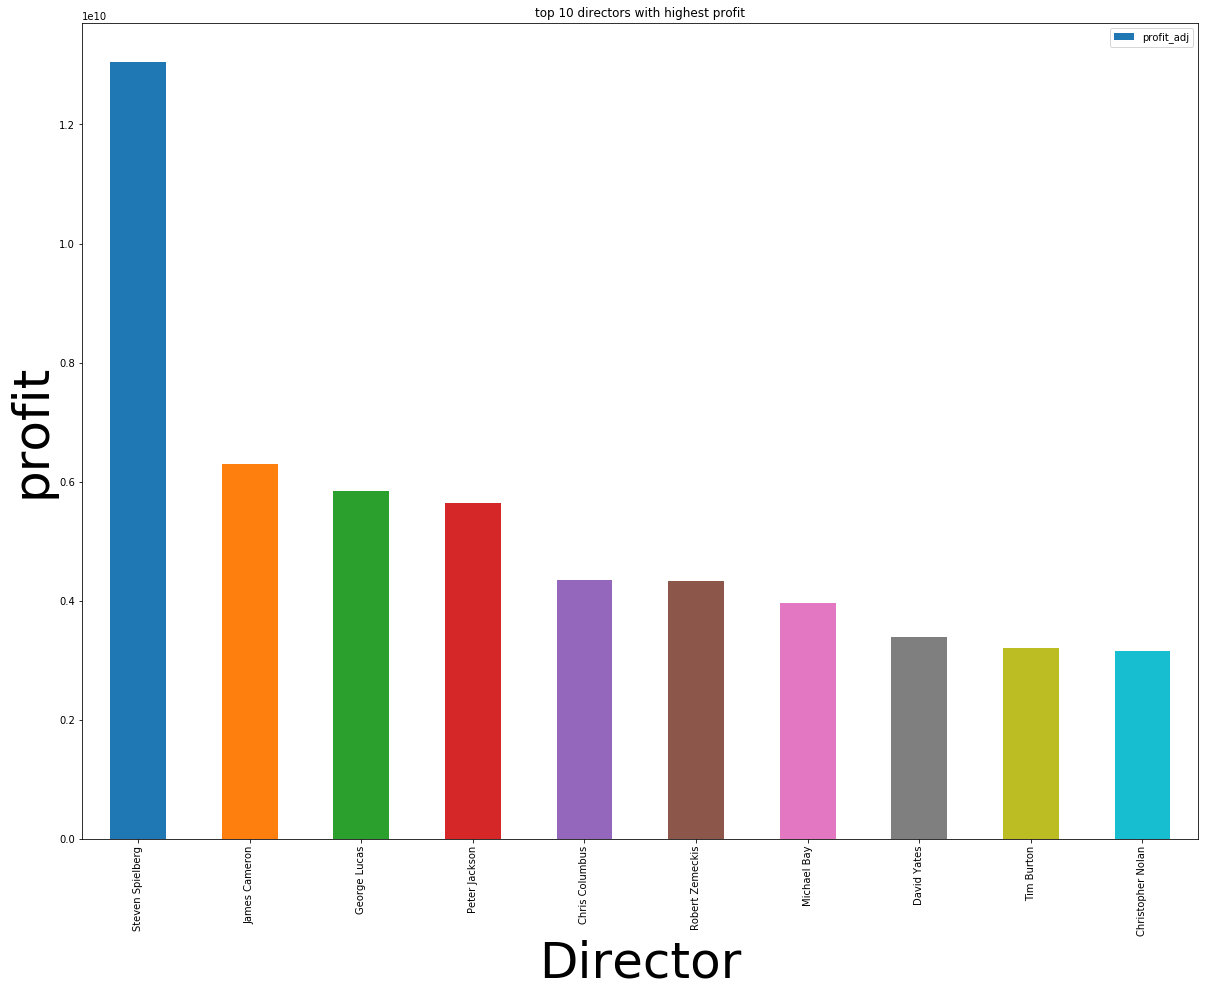

In [33]:
top10_directors.plot.bar( y="profit_adj", title="top 10 directors with highest profit" , figsize=(20,15));
plot.xlabel('Director', fontsize=50)
plot.ylabel('profit', fontsize=50)
plot.show(block=True);

#### Its very clear that "steven Spielberg" is number one with huge difference between him and othed directors.

### Research Question 4  (top 10 Actors made Appearances )

    Now let's take a look at the top 10 actors according to their appearances

In [34]:
def data(column):
    #will take a column, and separate the string by '|'
    x = df[column].str.cat(sep = '|')

    #giving pandas series and storing the values separately
    x = pd.Series(x.split('|'))

    #arranging in descending order
    count = x.value_counts(ascending = False)
    
    return count
count = data('cast')

y = count.nlargest(10)
y

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64

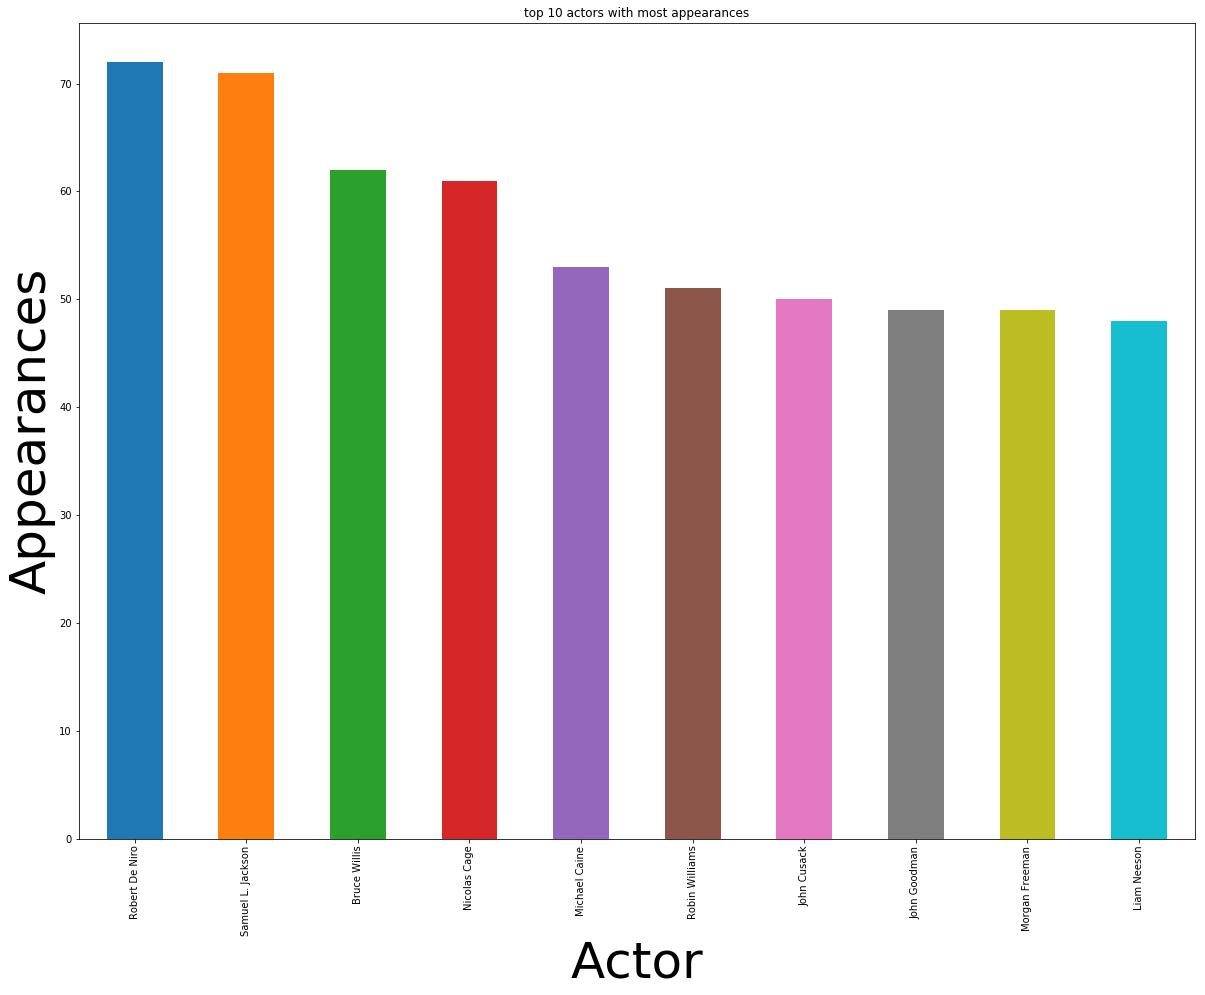

In [35]:
y.plot.bar( title="top 10 actors with most appearances" , figsize=(20,15));
plot.xlabel('Actor', fontsize=50)
plot.ylabel('Appearances', fontsize=50)
plot.show(block=True);

We can see the top 10 actors according to appearances : 1.Robert De Niro       72
                                                        2.Samuel L. Jackson    71
                                                        3.Bruce Willis         62
                                                        4.Nicolas Cage         61
                                                        5.Michael Caine        53
                                                        6.Robin Williams       51
                                                        7.John Cusack          50
                                                        8.John Goodman         49
                                                        9.Morgan Freeman       49
                                                        10.Liam Neeson         48

### Research Question 5  (was it fair to use 'budget_adj' & 'revenue_adj' to do analysis depending on revenue, budget & profit or not)

    The two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
    Was my choice to work using adjusted values right ?

    release_year      budget      revenue    budget_adj   revenue_adj
0           1960    22056948    145005000  1.626252e+08  1.069117e+09
1           1961    46137000    337720188  3.365630e+08  2.463622e+09
2           1962    54722126    215579846  3.944616e+08  1.553996e+09
3           1963    73331500    187404989  5.221334e+08  1.334357e+09
4           1964    39483161    340981782  2.775772e+08  2.397193e+09
5           1965    70205115    458081854  4.858590e+08  3.170185e+09
6           1966    57554800     84736689  3.866540e+08  5.692623e+08
7           1967   100652000    737834637  6.579383e+08  4.823051e+09
8           1968    71939000    264732980  4.509830e+08  1.659601e+09
9           1969    42129087    243957076  2.504264e+08  1.450145e+09
10          1970   126961946    560221969  7.130651e+08  3.146413e+09
11          1971    75997000    404910610  4.092587e+08  2.180523e+09
12          1972    36279254    494730171  1.891804e+08  2.579801e+09
13          1973    

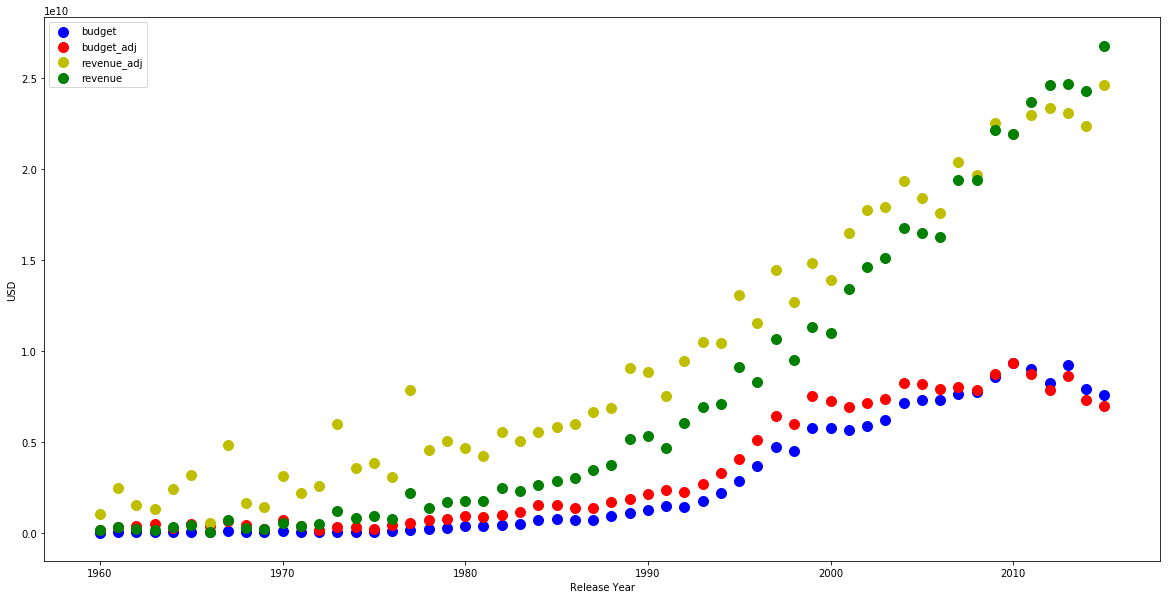

In [36]:
df2 = df.groupby('release_year', as_index=False)['budget','revenue','budget_adj','revenue_adj'].sum()
print(df2)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df2['release_year'], df2['budget'], s=100, c='b', marker="o", label='budget')
ax1.scatter(df2['release_year'], df2['budget_adj'], s=100, c='r', marker="o", label='budget_adj')
ax1.scatter(df2['release_year'], df2['revenue_adj'], s=100, c='y', marker="o", label='revenue_adj')
ax1.scatter(df2['release_year'], df2['revenue'], s=100, c='g', marker="o", label='revenue')
ax1.set_xlabel("Release Year")
ax1.set_ylabel("USD")
plt.legend(loc='upper left');
plt.show()

I think i was right...
As shown in the scatter plot the value differs between the normal values and adjusted values
So i think its fair to use adjusted values to compare between the movies "Financially"

<a id='conclusions'></a>
## Conclusions

    1.top 10 movies made revenues ( Avatar ,Star Wars, Titanic , The Exorcist , Jaws , Star Wars: The Force Awakens , E.T. the Extra-Terrestrial , The Net , One Hundred and One Dalmatians , The Avengers)
    2.top 10 movies made profits ( Star Wars , Avatar , Titanic , The Exorcist , Jaws, E.T. the Extra-Terrestrial , Star Wars: The Force Awakens , The Net , One Hundred and One Dalmatians , The Empire Strikes Back)
    3.not all movies with highest revenues are the ones made highest profits
    4.top 10 directors made profits (Steven Spielberg , James Cameron , George Lucas , Peter Jackson , Chris Columbus , Robert Zemeckis , Michael Bay , David Yates , Tim Burton , Christopher Nolan)
    5.top 10 actors with most appearances (Robert De Niro , Samuel L. Jackson , Bruce Willis , Nicolas Cage , Michael Caine , Robin Williams , John Cusack , John Goodman , Morgan Freeman , Liam Neeson)
    6.Using adjusted budget and revenue values gives us more fair comparison between the movies and directors "finantially"

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])